# 3 Total Units Sold

### function that get the total unit sold

In [1]:
def total_unit_sold(filename): # takes the file opened
    file = open(filename, 'r') # open file
    quantity, total_unit_sold, x= 0, 0, 0# variables to use
    while x < 100:  # while loop for each line
        data = file.readline()    # read first line
        if x == 0:  # to skip the first line of the titles
            x += 1
            continue  # skip first line
        if data =="":
            break
        list_data = data.split(",")  # get list of line data 
        quantity = int(list_data[2]) # get the quantity only from the line
        total_unit_sold += quantity # get the sum of them
    file.close()
    return total_unit_sold


### get total unit sold

In [2]:
filename = "Sales Data.csv" # file name  # "Test_sample - Copy.csv" # "Sales Data.csv"
total_unit_sol = total_unit_sold(filename)
print(f"Total unit sold is :{total_unit_sol}") # print the quantity

Total unit sold is :209079


# total numbers of orders

In [3]:

def total_number_of_orders(filename):  # function to calculate total number of orders
    file = open(filename, 'r')  # open the file
    total_orders, x = 0, 0  # variable to count orders
    order_id = []
    k = 1
    while x < 100:  
        data = file.readline()  
        if x == 0:  
            x += 1
            continue
        if data == "":

            break
        splitt = data.split(",")
        orderid = splitt[0]
        if orderid not in order_id:
            order_id.append(orderid)
            total_orders += 1  # increment order count
    
    file.close()  
    return total_orders
print(f"Total Number of Orders: {total_number_of_orders('Sales Data.csv')}")


Total Number of Orders: 178437


# 12. Product-level descriptive Sales stats (mean, median, std of Sales and Quantity) • Printed table.

### function get the names of the product into set

In [8]:
def get_product_names(filename): # takes the file name
    file = open(filename, 'r') # open file
    product_names = set() # make empty set
    x = 0
    while x < 100:  # while loop for each line to get product names
        data = file.readline()    # read first line
        if x == 0:  # to skip the first line of the titles
            x += 1
            continue  # skip first line
        if data =="":
            break
        list_data = data.split(",")  # get list of line data 
        product_names.add(list_data[1]) # get the product name only from the line in set
    file.close()
    return product_names

### function to get spicific product qunantity and sales in a list

In [9]:
def get_spicific_prodct_sales_and_quantity(filename,i): # takes the file name, spicific product name
    quantity_list_for_produnt , sales_list_for_produnt = [], []
    x = 0
    file = open(filename, 'r') # open file
    while x < 100:  # while loop for each line to get product names
        data = file.readline()    # read first line
        if x == 0:  # to skip the first line of the titles
            x += 1
            continue  # skip first line
        if data =="":
            break
        list_data = data.split(",")  # get list of line data 
        now_product_name = list_data[1] # to get the row product name
        if now_product_name == i: # only take values for the current produnt in the loop 
            qunatity = int(list_data[2]) # to get the qunantity for this specific produnt
            price = int(list_data[3]) # to get the price for this specific produnt
            sales_per_row = qunatity*price 
            quantity_list_for_produnt.append(qunatity) # add the qunatity sold of this row to list
            sales_list_for_produnt.append(sales_per_row)
    file.close()
    return quantity_list_for_produnt, sales_list_for_produnt # return this product quantity and sales
    

### function to get mean of something

In [10]:
def get_mean_of_(something): # get mean of something
    summ = sum(something)
    number = len(something)
    mean_of_specific_thing = summ/number
    return mean_of_specific_thing

### function to get median of something

In [11]:
def get_median_of_something(somthing):
    sortedd = sorted(somthing)
    num = len(sortedd)
    if num%2 != 0:
        mid_num = num//2  # +1
        median=sortedd[mid_num]
    else:
        mid_num1 = num//2-1 # should be +1
        mid_num2 = num//2
        median1=sortedd[mid_num1]
        median2=sortedd[mid_num2]
        median = (median1+median2)/ 2
    return median

### function to get the std of something

In [12]:
def std_of_something(something, mean): # need the list and mean 
    sum_diff = 0
    for i in something:
        diff = (i - mean)**2
        sum_diff += diff
    var = sum_diff/len(something)
    std = var**0.5
    return std

## make the task number 12

In [13]:
product_names, product_mean_sales, product_median_sales = set(), [], [] # thing i would need
product_std_sales , produnct_quantity_mean , product_quantity_median, product_quantity_std, product_sales_std= [], [], [], [], []



product_names = get_product_names(filename) # the produnt names
#print(product_names) # to see the product names
for i in product_names:
    #print(i) #prodct we are in now
    quantity_list_for_produnt, sales_list_for_produnt = get_spicific_prodct_sales_and_quantity(filename, i)  
    #print(quantity_list_for_produnt,sales_list_for_produnt)
    ### by this we got the sales and quantity for this product ### so lets calcualte the mean and etc. for this product
    product_mean_sales.append(get_mean_of_(sales_list_for_produnt)) # get mean of sales of product and add it in list of means
    sales_mean = get_mean_of_(sales_list_for_produnt)
    produnct_quantity_mean.append(get_mean_of_(quantity_list_for_produnt)) # get mean of quantitiy
    quantity_mean = get_mean_of_(quantity_list_for_produnt)

    product_median_sales.append(get_median_of_something(sales_list_for_produnt)) # get median of sales of product
    product_quantity_median.append(get_median_of_something(quantity_list_for_produnt))

    product_sales_std.append(std_of_something(sales_list_for_produnt,sales_mean))
    product_quantity_std.append(std_of_something(quantity_list_for_produnt,quantity_mean))

#### print the table of task number 12

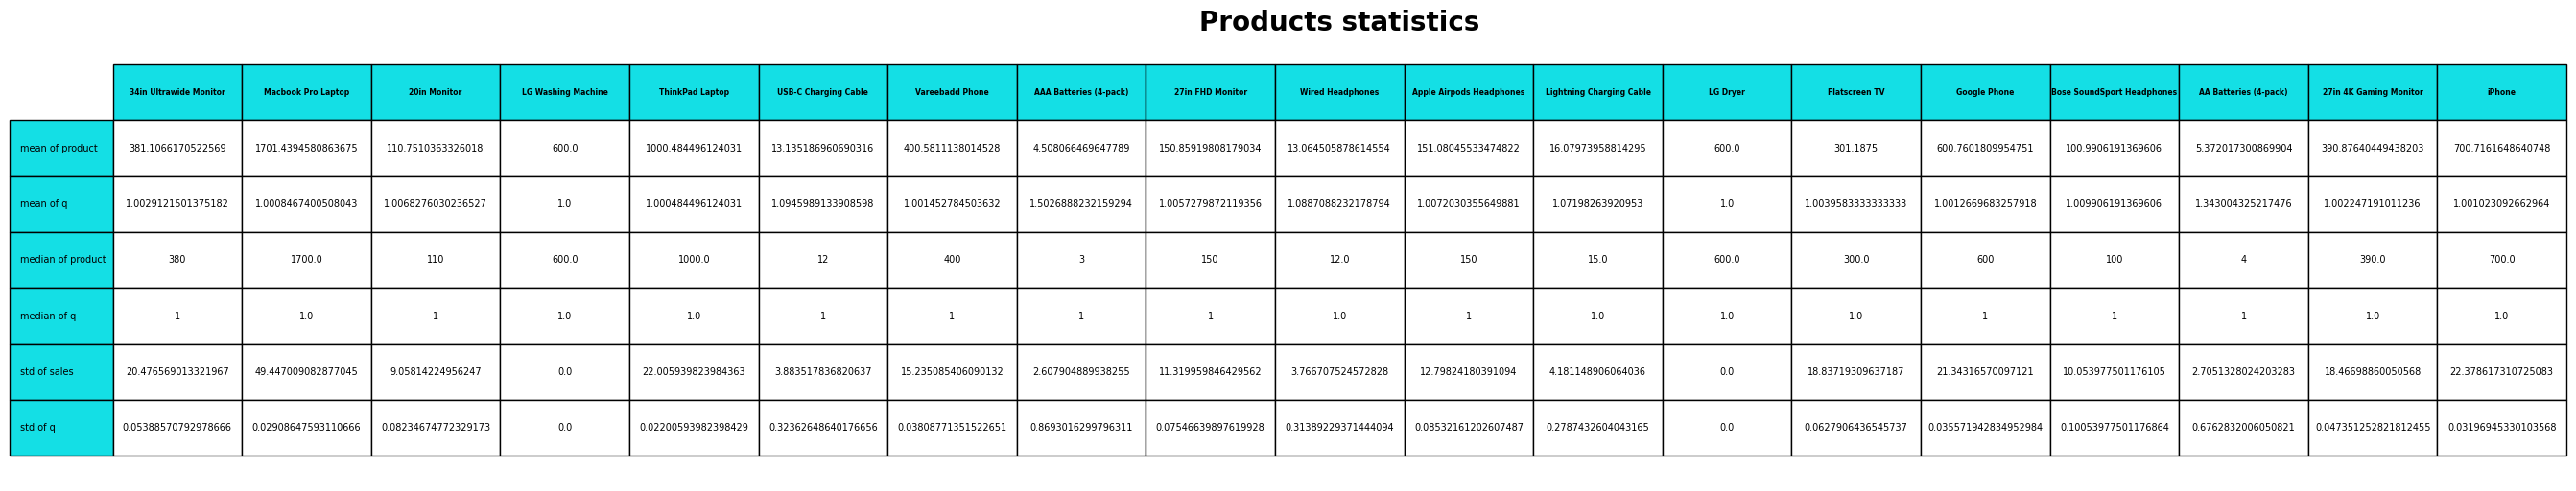

In [14]:
import matplotlib.pyplot as plt
data = [product_mean_sales,produnct_quantity_mean, product_median_sales,  product_quantity_median, product_sales_std, product_quantity_std]

ylables = list(product_names)
xlables = ["mean of product","mean of q","median of product","median of q","std of sales", "std of q"]
fig, axe = plt.subplots(figsize=(30, 6))
y=axe.table(data, cellLoc="center",loc="center", colLabels=ylables,rowLabels=xlables, colColours=["#0DDEE5F8"]*len(ylables),rowColours=["#0DDEE5F8"]*len(xlables),)
y.auto_set_font_size(False)
y.set_fontsize(7)
y.scale(1.1, 3.5) # 1.2 wider, 3.5 higher
axe.axis('off')
axe.set_title("Products statistics", fontsize=20, fontweight='bold',)

for i in range(len(product_names)):
    cell = y[(0,i)]  # Row 1, Column 2
    cell.set_text_props(weight='bold', color='black')
    cell.set_fontsize(5.5)
    #cell.set_height(0.1)  # Change row height
    #cell.set_width(0.1)   # Change column width
plt.show()

# Derived Column: City Extraction

In [15]:

filename = "Sales Data.csv" 

def add_city_colo(filename):
    filer = open(filename, "r")
    data = filer.readlines()
    filea = open(filename, "w")
    new_data = []
    x =0
    for i in data:  # while loop for each line    
        datas = i.split(",")
        if x == 0: 
            last = str(datas[-1])
            if "\n" in last:
                co=len(last)
                ci = 0
                k = ""
                for i in last:
                    if  ci == co-1:
                        break
                    ci+= 1
                    k += i
                datas[-1] = k
            datas.append(" City ")
            x += 1
        if i =="":
            break
        if x != 1:
            city = datas[6]
        last = str(datas[-1])
        if "\n" in last:
            co=len(last)
            ci = 0
            k = ""
            for i in last:
                if  ci == co-1:
                    break
                ci+= 1
                k += i
            datas[-1] = k
            datas.append(city)
        x += 1
        new_data.append(datas) # append list in list
        #print(new_data)
    for i in new_data:
        count = len(i)
        c = 0
        for x in i:
            c +=1
            #print(x,c)
            filea.writelines(str(x))
            if c != count:
                filea.writelines(",")
        filea.writelines("\n")
                
    filea.close()
    filer.close()
#file.close()

add_city_colo(filename)


# Derived Column: Month Extraction

In [16]:

filename = "Sales Data.csv" 

def add_month_colo(filename):
    filer = open(filename, "r")
    data = filer.readlines()
    filea = open(filename, "w")
    new_data = []
    x = 0
    for i in data:  # while loop for each line    
        datas = i.split(",")
        if x == 0: 
            last = str(datas[-1])
            if "\n" in last:
                co=len(last)
                ci = 0
                k = ""
                for i in last:
                    if  ci == co-1:
                        break
                    ci+= 1
                    k += i
                datas[-1] = k
            datas.append(" Month ")
            x += 1
        if i =="":
            break
        if x != 1:
            month1 = datas[4]
            try:
                months = month1.split("-")
                month = months[1]
            except:
                months = month1.split("/")
                month = months[1]
        last = str(datas[-1])
        if "\n" in last:
            co=len(last)
            ci = 0
            k = ""
            for i in last:
                if  ci == co-1:
                    break
                ci+= 1
                k += i
            datas[-1] = k
            datas.append(month)
        x += 1
        new_data.append(datas) # append list in list
        #print(new_data)
    for i in new_data:
        count = len(i)
        c = 0
        for x in i:
            c +=1
            #print(x,c)
            filea.writelines(str(x))
            if c != count:
                filea.writelines(",")
        filea.writelines("\n")
                
    filea.close()
    filer.close()
#file.close()

add_month_colo(filename)

# Derived Column: Sales Extraction

In [17]:

filename = "Sales Data.csv" 

def add_month_colo(filename):
    filer = open(filename, "r")
    data = filer.readlines()
    filea = open(filename, "w")
    new_data = []
    x =0
    for i in data:  # while loop for each line    
        datas = i.split(",")
        if x == 0: 
            last = str(datas[-1])
            if "\n" in last:
                co=len(last)
                ci = 0
                k = ""
                for i in last:
                    if  ci == co-1:
                        break
                    ci+= 1
                    k += i
                datas[-1] = k
            datas.append(" Sales ")
            x += 1
        if i =="":
            break
        if x != 1:
            q = int(datas[2])
            price = int(datas[3])
            sales = q*price
        last = str(datas[-1])
        if "\n" in last:
            co=len(last)
            ci = 0
            k = ""
            for i in last:
                if  ci == co-1:
                    break
                ci+= 1
                k += i
            datas[-1] = k
            datas.append(sales)
        x += 1
        new_data.append(datas) # append list in list
        #print(new_data)
    for i in new_data:
        count = len(i)
        c = 0
        for x in i:
            c +=1
            #print(x,c)
            filea.writelines(str(x))
            if c != count:
                filea.writelines(",")
        filea.writelines("\n")
                
    filea.close()
    filer.close()
#file.close()

add_month_colo(filename)

[6244, 6849, 7550, 13457, 15661, 20557, 23217, 23975, 27635, 31017]
['27in 4K Gaming Monitor', 'iPhone', '27in FHD Monitor', 'Bose SoundSport Headphones', 'Apple Airpods Headphones', 'Wired Headphones', 'Lightning Charging Cable', 'USB-C Charging Cable', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)']


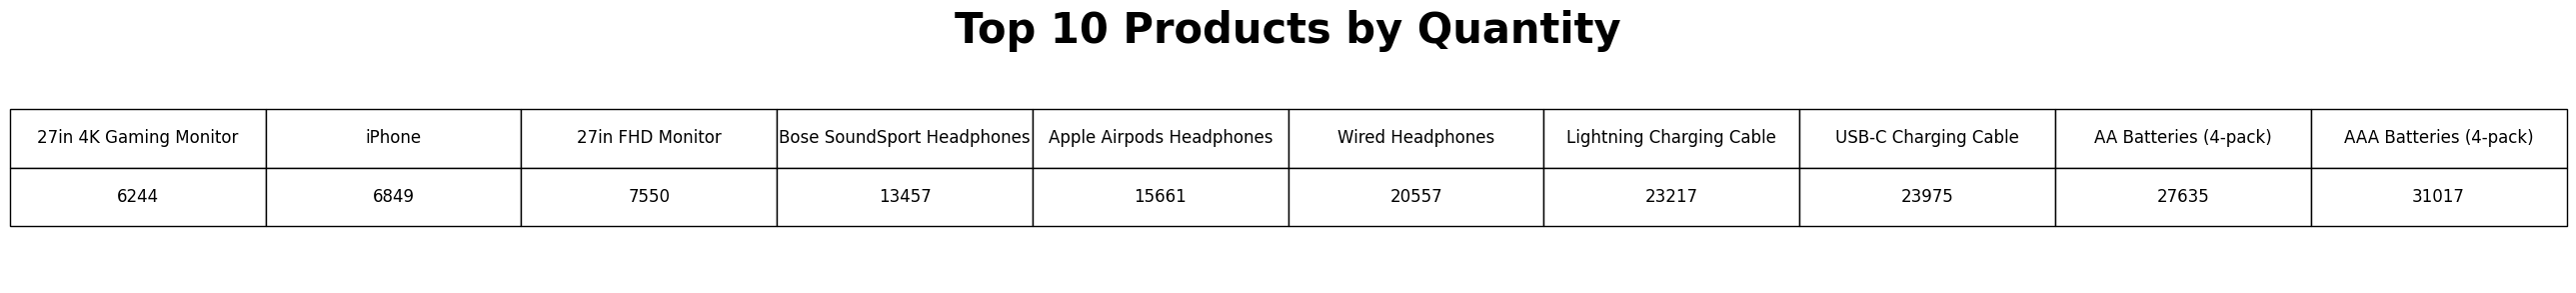

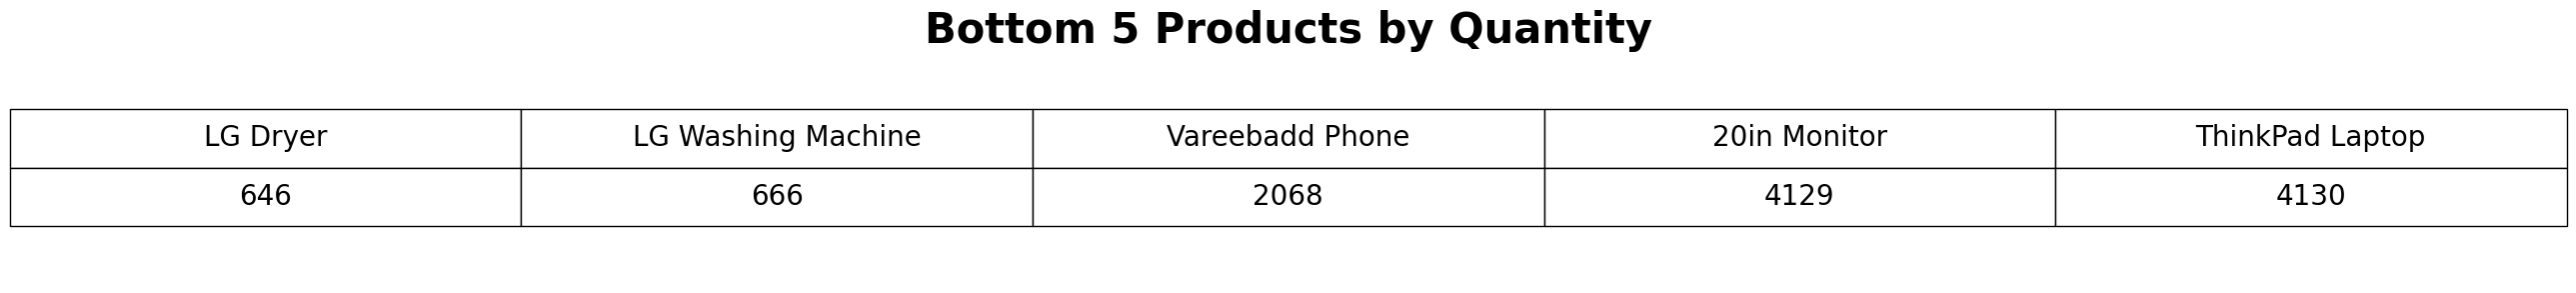

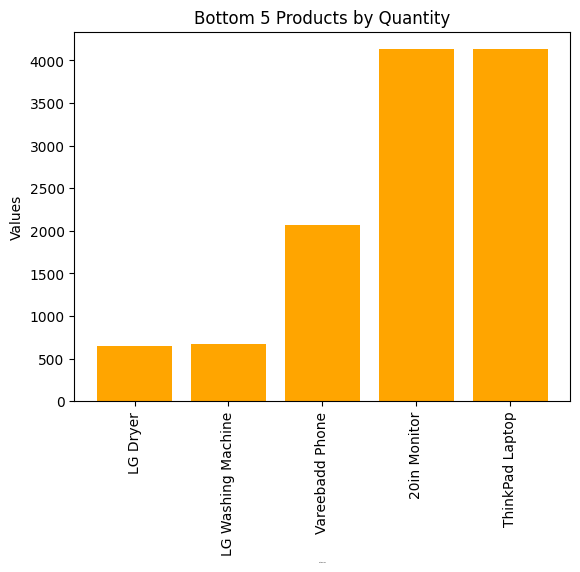

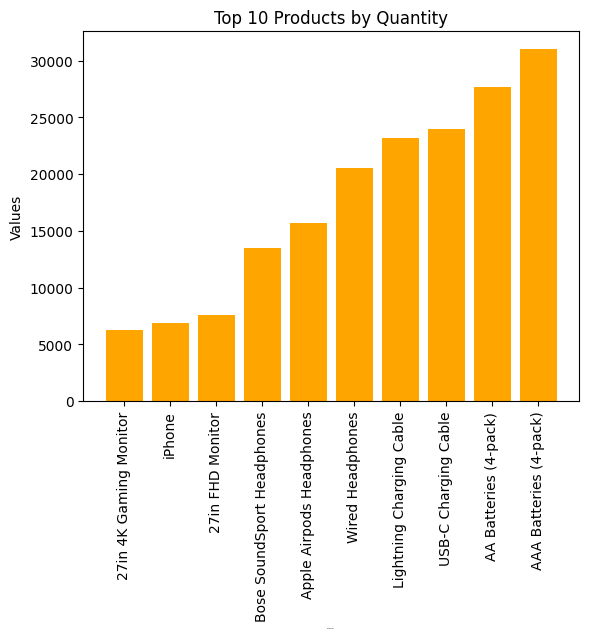

In [17]:
dict_of_product_quantity = {}
lists = []
quantity_sorted_product_bottom5names = []
quantity_sorted_product_top10names = []
product_names=get_product_names(filename)
for i in product_names:
    
    #print(i) #prodct we are in now
    quantity_list_for_produnt, sales_list_for_produnt = get_spicific_prodct_sales_and_quantity(filename, i) 
    quantity_sum = sum(quantity_list_for_produnt) 
    dict_of_product_quantity[quantity_sum]= i

dict_of_product_quantity_sorted = dict(sorted(dict_of_product_quantity.items()))
quantity_sorted = list(dict_of_product_quantity_sorted.keys())
quantity_sorted_bottom5 =  quantity_sorted[:5]
for i in quantity_sorted_bottom5:
    quantity_sorted_product_bottom5names.append(dict_of_product_quantity_sorted[i])

p = len(quantity_sorted)
quantity_sorted_top10 =  quantity_sorted[p-10:]
for i in quantity_sorted_top10:
    quantity_sorted_product_top10names.append(dict_of_product_quantity_sorted[i])




import matplotlib.pyplot as plt
########### top 10
data = [quantity_sorted_product_top10names,quantity_sorted_top10]
print(quantity_sorted_top10)
print(quantity_sorted_product_top10names)
fig, axe = plt.subplots(figsize=(30, 3)) 
y=axe.table(data, cellLoc="center",loc="center")
y.auto_set_font_size(False)
y.set_fontsize(12)
y.scale(1.1, 3.5) # 1.2 wider, 3.5 higher
axe.axis('off')
axe.set_title("Top 10 Products by Quantity", fontsize=30, fontweight='bold') 
plt.show()


########################## bottom 5
data = [quantity_sorted_product_bottom5names,quantity_sorted_bottom5]
fig, axe = plt.subplots(figsize=(30, 3)) 
y=axe.table(data, cellLoc="center",loc="center")
y.auto_set_font_size(False)
y.set_fontsize(20)
y.scale(1.1, 3.5) # 1.2 wider, 3.5 higher
axe.axis('off')
axe.set_title("Bottom 5 Products by Quantity", fontsize=30, fontweight='bold') 
plt.show()


categories = quantity_sorted_product_bottom5names
values = quantity_sorted_bottom5

# Create bar plot
plt.bar(categories, values, color='orange')
plt.title('Bottom 5 Products by Quantity')
plt.xticks(rotation=90)
plt.xlabel('Categories', fontsize=1)
plt.ylabel('Values')
plt.show()


categories = quantity_sorted_product_top10names
values = quantity_sorted_top10

# Create bar plot
plt.bar(categories, values, color='orange')
plt.title('Top 10 Products by Quantity')
plt.xticks(rotation=90)
plt.xlabel('Categories', fontsize=1)
plt.ylabel('Values')
plt.show()


dict_items([(2355620, '34in Ultrawide Monitor'), (8037600, 'Macbook Pro Laptop'), (454190, '20in Monitor'), (399600, 'LG Washing Machine'), (4130000, 'ThinkPad Laptop'), (287700, 'USB-C Charging Cable'), (827200, 'Vareebadd Phone'), (93051, 'AAA Batteries (4-pack)'), (1132500, '27in FHD Monitor'), (246684, 'Wired Headphones'), (2349150, 'Apple Airpods Headphones'), (348255, 'Lightning Charging Cable'), (387600, 'LG Dryer'), (1445700, 'Flatscreen TV'), (3319200, 'Google Phone'), (1345700, 'Bose SoundSport Headphones'), (110540, 'AA Batteries (4-pack)'), (2435160, '27in 4K Gaming Monitor'), (4794300, 'iPhone')])
[1132500, 1345700, 1445700, 2349150, 2355620, 2435160, 3319200, 4130000, 4794300, 8037600]
['27in FHD Monitor', 'Bose SoundSport Headphones', 'Flatscreen TV', 'Apple Airpods Headphones', '34in Ultrawide Monitor', '27in 4K Gaming Monitor', 'Google Phone', 'ThinkPad Laptop', 'iPhone', 'Macbook Pro Laptop']


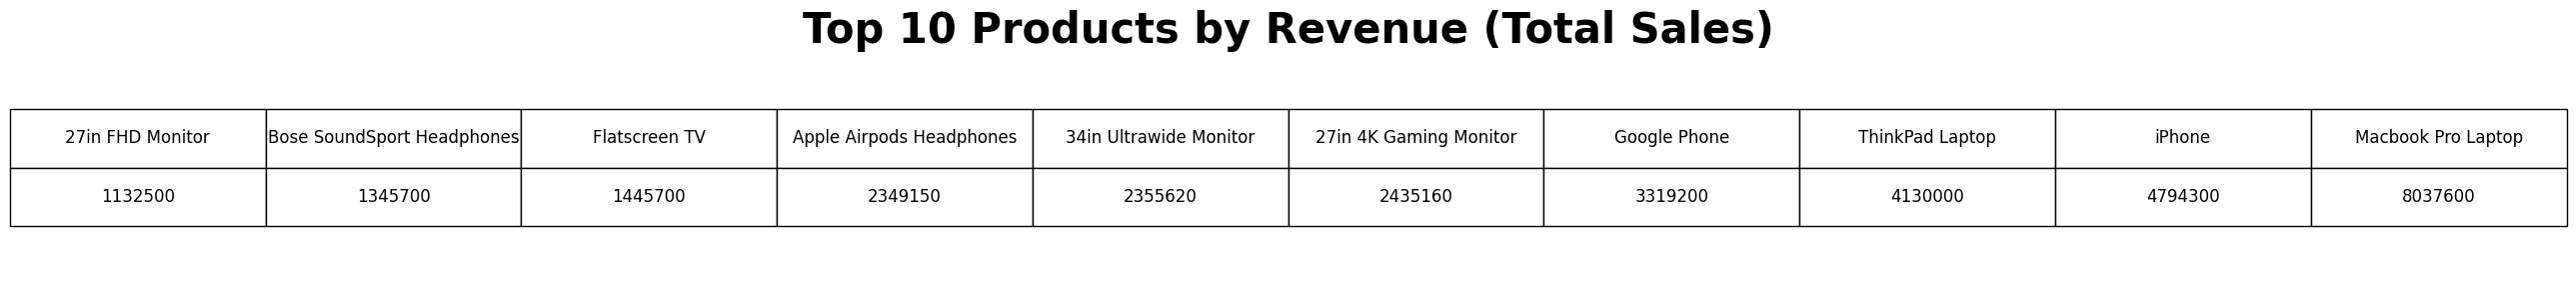

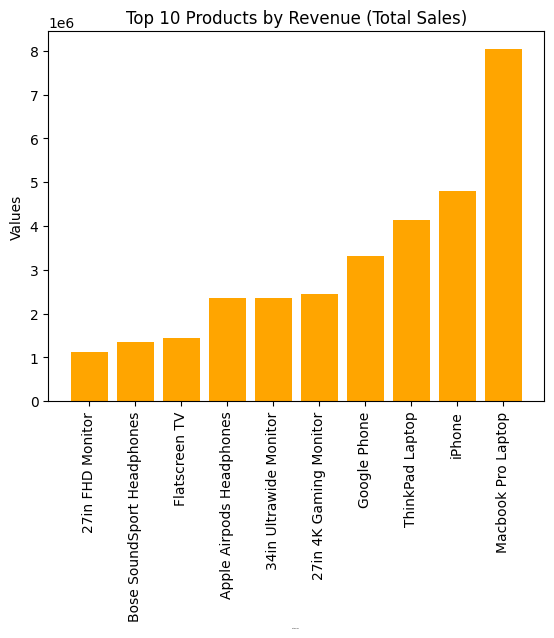

In [ ]:
dict_of_product_revenue = {}
lists = []
revenue_sorted_product_top10names = []
product_names=get_product_names(filename)
for i in product_names:
    
    #print(i) #prodct we are in now
    quantity_list_for_produnt, sales_list_for_produnt = get_spicific_prodct_sales_and_quantity(filename, i) 
    revenue_sum = sum(sales_list_for_produnt) 
    dict_of_product_revenue[revenue_sum]= i

dict_of_product_revenue_sorted = dict(sorted(dict_of_product_revenue.items()))
quantity_sorted = list(dict_of_product_revenue_sorted.keys())

p = len(quantity_sorted)
revenue_sorted_top10 =  quantity_sorted[p-10:]
for i in revenue_sorted_top10:
    revenue_sorted_product_top10names.append(dict_of_product_revenue_sorted[i])

data = [revenue_sorted_product_top10names,revenue_sorted_top10]
print(revenue_sorted_top10)
print(revenue_sorted_product_top10names)
fig, axe = plt.subplots(figsize=(30, 3)) 
y=axe.table(data, cellLoc="center",loc="center")
y.auto_set_font_size(False)
y.set_fontsize(12)
y.scale(1.1, 3.5) # 1.1 wider, 3.5 higher
axe.axis('off')
axe.set_title("Top 10 Products by Revenue (Total Sales)", fontsize=30, fontweight='bold') 
plt.show()

categories = revenue_sorted_product_top10names
values = revenue_sorted_top10

# Create bar plot
plt.bar(categories, values, color='orange')
plt.title('Top 10 Products by Revenue (Total Sales)')
plt.xticks(rotation=90)
plt.xlabel('Categories', fontsize=1)
plt.ylabel('Values')
plt.show()



# """task 11: top 10 Products with highest revenue per unit"""

The product with the highest revenue is : [dict_keys(['AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones', 'USB-C Charging Cable', 'Lightning Charging Cable', 'Bose SoundSport Headphones', '20in Monitor', '27in FHD Monitor', 'Apple Airpods Headphones', 'Flatscreen TV', '34in Ultrawide Monitor', '27in 4K Gaming Monitor', 'Vareebadd Phone', 'LG Dryer', 'LG Washing Machine', 'Google Phone', 'iPhone', 'ThinkPad Laptop', 'Macbook Pro Laptop'])] with a revenue of : [1700.0]


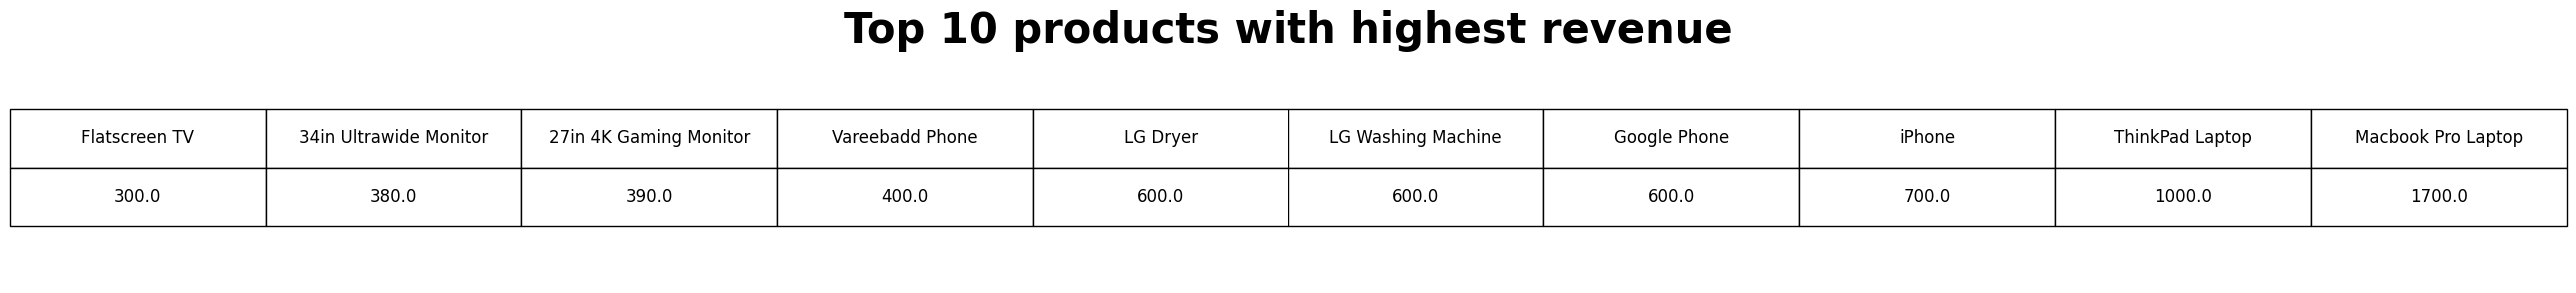

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Flatscreen TV'),
  Text(1, 0, '34in Ultrawide Monitor'),
  Text(2, 0, '27in 4K Gaming Monitor'),
  Text(3, 0, 'Vareebadd Phone'),
  Text(4, 0, 'LG Dryer'),
  Text(5, 0, 'LG Washing Machine'),
  Text(6, 0, 'Google Phone'),
  Text(7, 0, 'iPhone'),
  Text(8, 0, 'ThinkPad Laptop'),
  Text(9, 0, 'Macbook Pro Laptop')])

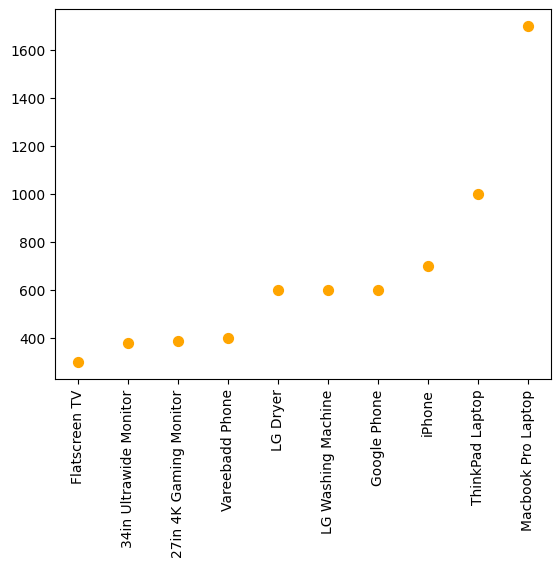

In [33]:
listsorted= {}
product_names = get_product_names(filename) # the produnt names
list_of_list_product_revenue = []
list_of_list_product_revenues, list_of_list_product_revenues_namekey = {},{}
for i in product_names:
    quantity_list_for_produnt, sales_list_for_produnt = get_spicific_prodct_sales_and_quantity(filename, i) 
    ava_revenue_per_product = sum(sales_list_for_produnt)/sum(quantity_list_for_produnt)
    list_of_list_product_revenue.append(ava_revenue_per_product)
    #list_of_list_product_revenues[ava_revenue_per_product] = i
    list_of_list_product_revenues_namekey[i] = ava_revenue_per_product # key is the product name and value is the price

names = list_of_list_product_revenues_namekey.values()
namessort = sorted(names)
for i in namessort: 
    for k in list(list_of_list_product_revenues_namekey.keys()):
        y=list_of_list_product_revenues_namekey[k] 
        if i ==y :
            listsorted[k] = list_of_list_product_revenues_namekey[k]
#print(listsorted) # sorted dict with the key is the name and value is the price
#list_of_list_product_revenue_sorted = dict(sorted(list_of_list_product_revenues.items()))
#quantity_sorted = list(list_of_list_product_revenue_sorted.keys())
values = list(listsorted.values())
p = len(values)
#print(quantity_sorted, 10)
revenue_sorted_top10 =  values[p-10:]
revenue_sorted_product_top10names = []
keys = list(listsorted.keys())
porduct_sorted_top10 =  keys[p-10:]
for i in revenue_sorted_top10:
    keys = listsorted.keys()
    revenue_sorted_product_top10names.append(keys)
categories = porduct_sorted_top10
values = revenue_sorted_top10

print(f"The product with the highest revenue is : [{revenue_sorted_product_top10names[-1]}] with a revenue of : [{revenue_sorted_top10[-1]}]")
data = [porduct_sorted_top10,revenue_sorted_top10]
fig, axe = plt.subplots(figsize=(30, 3)) 
y=axe.table(data, cellLoc="center",loc="center")
y.auto_set_font_size(False)
y.set_fontsize(12)
y.scale(1.1, 3.5) # 1.2 wider, 3.5 higher
axe.axis('off')
axe.set_title("Top 10 products with highest revenue", fontsize=30, fontweight='bold') 
plt.show()

plt.scatter(porduct_sorted_top10, revenue_sorted_top10, s=50, alpha=1, color='orange', )
plt.xticks(rotation=90)

# total revenue of the file

In [20]:
def total_revenue(filename): # takes the file opened
    file = open(filename, 'r') # open file
    revenue , total_revenue , x= 0, 0, 0 # variables to use
    while x < 100:  # while loop for each line
        data = file.readline()    # read first line
        if x == 0:  # to skip the first line of the titles
            x += 1
            continue  # skip first line
        if data =="":
            break
        list_data = data.split(",")  # get list of line data 
        quantity = int(list_data[2]) # get the quantity only from the line
        unit_price = float(list_data[3]) # get the unit price only from the line
        revenue = quantity * unit_price # calculate revenue for that line
        total_revenue += revenue  # add to total revenue
        
    file.close()
    return total_revenue
print(f"Total Revenue: {total_revenue("Sales Data.csv")}")

Total Revenue: 34499750.0


# median order value

Median Order Value Median: (24.0, 3.0, 1700.0)
24.0 1700.0 1700.0
Median Order Value: (15.0, 3.0, 3780.0)
|median | min | max    |
------------------------
|15.0   | 3.0 | 3780.0 |
------------------------


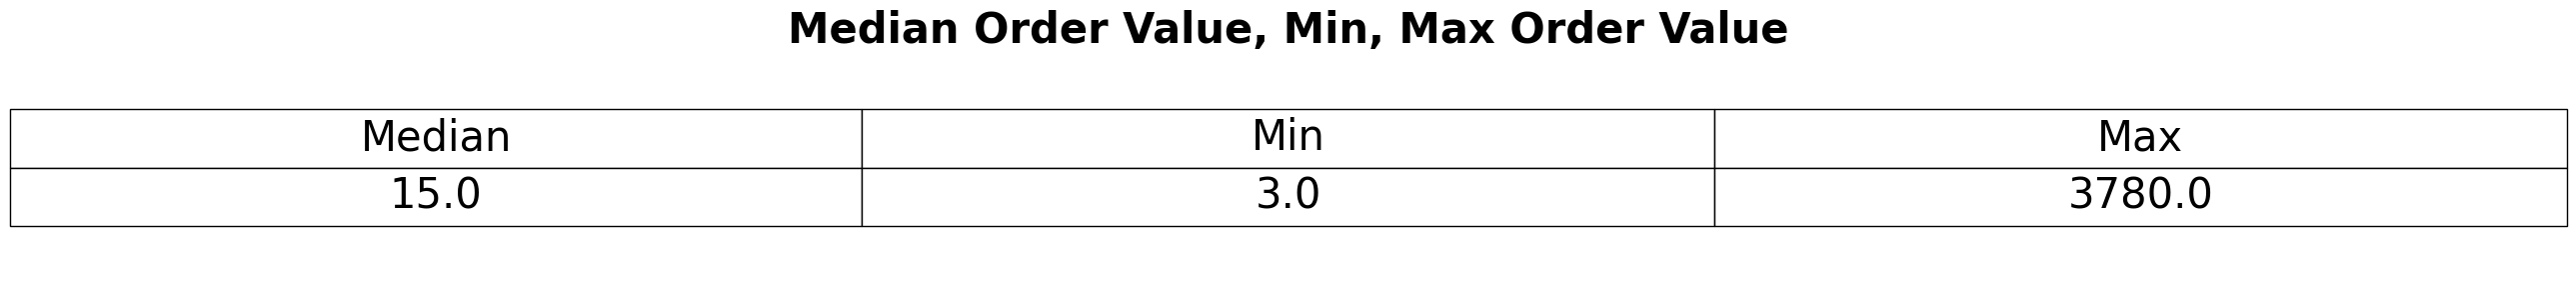

In [21]:
import matplotlib.pyplot as plt
def median_order_value(filename):  # function to calculate median order value
    order_total = {}
    file = open(filename, 'r')  # open the file
    order_values, x = [], 0  # list to store order values
    while x < 100: 
        data = file.readline()  
        if x == 0:  
            x += 1
            continue
        if data == "":  
            break
        list_data = data.split(",")
        splitt = data.split(",")
        orderid = splitt[0] 
        x +=1
        quantity = int(list_data[2]) 
        unit_price = float(list_data[3])        
        order_id = list_data[0]
        sales= unit_price * quantity  #sales equation.

        if order_id in order_total:
            sales = sales + order_total[order_id]  ###### finally solved this problem , now i can implement it into omar uses
            order_total[order_id] = sales  # same orders are combined (to get the total money per order).
        order_total[order_id] = sales
    order_values = order_total.values()
    median =get_median_of_something(order_values)
    minx = min(order_values)
    maxx= max(order_values)
    file.close()  
    return median, minx, maxx

print(f"Median Order Value Median: {median_order_value('Sales Data.csv')}")
median,minx,minx =median_order_value('Sales Data.csv')
print(median,minx,minx)
def median_order_value(filename):  # function to calculate median order value
    order_total = {}
    file = open(filename, 'r')  # open the file
    order_values, x = [], 0  # list to store order values
    while x < 100: 
        data = file.readline()  
        if x == 0:  
            x += 1
            continue
        if data == "":  
            break
        list_data = data.split(",")
        splitt = data.split(",")
        orderid = splitt[0] 
        #print(x)
        quantity = int(list_data[2]) 
        unit_price = float(list_data[3])        
        order_id = list_data[0]
        sales= unit_price * quantity  #sales equation.
        if order_id in order_total:
            sales = sales + order_total[order_id]  ###### finally solved this problem , now i can implement it into omar uses
            order_total[order_id] = sales  # same orders are combined (to get the total money per order).
        order_total[order_id] = sales
    order_values = order_total.values()
    median =get_median_of_something(order_values)
    minx = min(order_values)
    maxx= max(order_values)
    file.close()  
    return median, minx, maxx

print(f"Median Order Value: {median_order_value('Sales Data.csv')}")
median, minx, maxx = median_order_value('Sales Data.csv')
print("|median | min | max    |")
print("------------------------")
print(f"|{median}   | {minx} | {maxx} |")
print("------------------------")

data = [["Median", "Min", "Max"],[median,minx,maxx]]
fig, axe = plt.subplots(figsize=(30, 3)) 
y=axe.table(data, cellLoc="center",loc="center")
y.auto_set_font_size(False)
y.set_fontsize(30)
y.scale(1.1, 3.5) # 1.2 wider, 3.5 higher
axe.axis('off')
axe.set_title("Median Order Value, Min, Max Order Value", fontsize=30, fontweight='bold') 
plt.show()

# Sales Per City

In [22]:
def get_city_names(filename): 
    file = open(filename, 'r') 
    city_names = set() 
    x = 0
    while x < 100: 
        data = file.readline()    
        if x == 0:  
            x += 1
            continue 
        if data =="":
            break
        list_data = data.split(",") 
        city_names.add(list_data[6]) 
    file.close()
    return city_names
get_city_names ("Sales Data.csv")

{' Atlanta',
 ' Austin',
 ' Boston',
 ' Dallas',
 ' Los Angeles',
 ' New York City',
 ' Portland',
 ' San Francisco',
 ' Seattle'}

In [23]:
#set to list
Var_city=get_city_names("Sales Data.csv")
city_names_list=list(Var_city)
print(city_names_list)

[' San Francisco', ' Boston', ' Portland', ' Los Angeles', ' Austin', ' Dallas', ' New York City', ' Seattle', ' Atlanta']


In [24]:
def get_spicific_city_sales_and_quantity(filename,i): 
    quantity_list_for_city , sales_list_for_city = [], []
    x = 0
    file = open(filename, 'r') 
    while x < 100:  
        data = file.readline()    
        if x == 0:  
            x += 1
            continue 
        if data =="":
            break
        list_data = data.split(",")  
        now_city_name = list_data[6] 
        if now_city_name == i: 
            qunatity = int(list_data[2]) 
            price = int(list_data[3]) 
            sales_per_row = qunatity*price
            quantity_list_for_city.append(qunatity) 
            sales_list_for_city.append(sales_per_row)
    file.close()
    return quantity_list_for_city, sales_list_for_city 
sum_city_list=[]
for i in city_names_list:
    qun_city_list,sales_city_list=get_spicific_city_sales_and_quantity("Sales Data.csv",i)
    sum_city_sales=sum(sales_city_list)
    print(sum_city_sales, i )
    sum_city_list.append(sum_city_sales)

8264049  San Francisco
3662478  Boston
2321019  Portland
5453807  Los Angeles
1819987  Austin
2768598  Dallas
4665339  New York City
2748361  Seattle
2796112  Atlanta


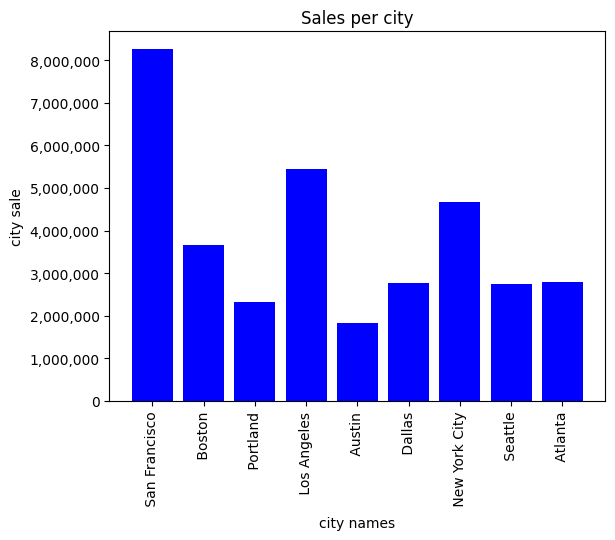

In [25]:
import matplotlib.pyplot as plt
x_axis = city_names_list
y_axis = sum_city_list
plt.bar(x_axis, y_axis, color='blue')
plt.gca().yaxis.set_major_formatter(('{x:,.0f}'))
plt.title('Sales per city')
plt.xlabel('city names')
plt.xticks(rotation=90)
plt.ylabel('city sale')
plt.show()

# Average Sales Per Month

In [26]:
def get_spicific_month_sales_and_quantity(filename,i): 
    quantity_list_for_month , sales_list_for_month = [], []
    x = 0
    file = open(filename, 'r') 
    while x < 100: 
        data = file.readline()    
        if x == 0: 
            x += 1
            continue  
        if data =="":
            break
        list_data = data.split(",")  
        now_date_name = list_data[4] 
        try:
            months = now_date_name.split("-")
            month = int(months[1])
        except:
            months = now_date_name.split("/")
            month = int(months[1])
        if month == i:
            qunatity = int(list_data[2])
            price = int(list_data[3])
            sales_per_row = qunatity*price
            quantity_list_for_month.append(qunatity)
            sales_list_for_month.append(sales_per_row)
    file.close()
    return quantity_list_for_month, sales_list_for_month

In [27]:
list_of_ava = []
for i in range(1,13):
     quantity_list_for_month, sales_list_for_month = get_spicific_month_sales_and_quantity("Sales Data.csv", i)
     sum_of_month = sum(sales_list_for_month)
     count_of_month = len(sales_list_for_month)
     ava = sum_of_month/count_of_month
     list_of_ava.append(ava)

print(list_of_ava )

[187.728396333299, 183.9262630480167, 185.2914934336435, 185.53772088188632, 190.34649281661234, 190.22967389700457, 185.2908416707479, 187.69049410584398, 180.5397986403924, 184.27970614337838, 182.11659932851535, 184.69748639129043]


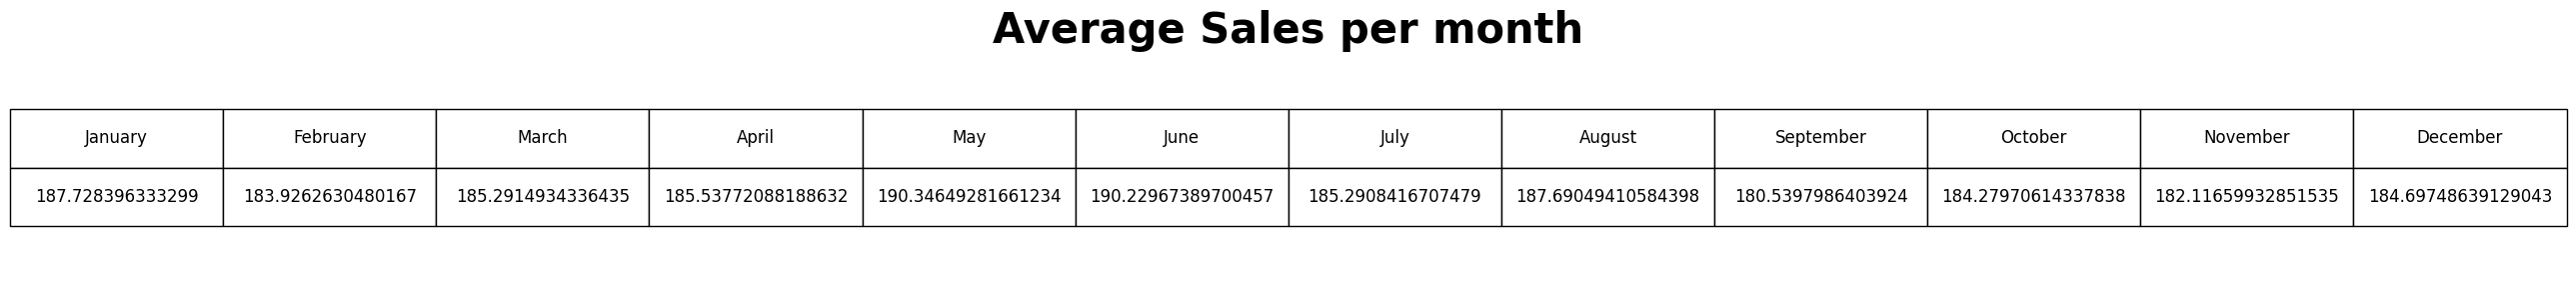

In [28]:
import matplotlib.pyplot as plt
data = [ ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],list_of_ava]
fig, axe = plt.subplots(figsize=(30, 3)) 
y=axe.table(data, cellLoc="center",loc="center")
y.auto_set_font_size(False)
y.set_fontsize(12)
y.scale(1.1, 3.5)
axe.axis('off')
axe.set_title("Average Sales per month", fontsize=30, fontweight='bold') 
plt.show()

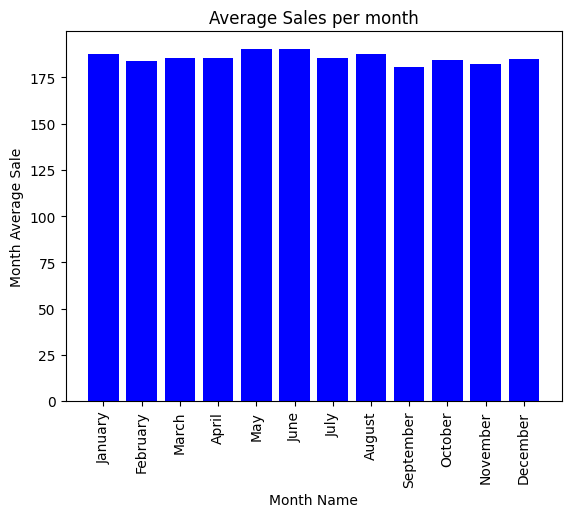

In [29]:
import matplotlib.pyplot as plt
x_axis = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
y_axis = list_of_ava
plt.bar(x_axis, y_axis, color='blue')
plt.title('Average Sales per month')
plt.xlabel('Month Name')
plt.xticks(rotation=90)
plt.ylabel('Month Average Sale')
plt.show()

In [7]:
"""task2: number of unique numbers."""
filename= "Sales Data.csv"
values = 0
with open(filename,'r') as file:
    product_list = []
    gdsayufv = file.readline()
    for line in file:         #reading each line at a time 
       values= line.split(',')
       products = values[1]
       product_list.append(products)

unique_products = []
count_of_unique_nums = 0
for product in product_list: #Identify which products names appear once in the list.
    if product not in unique_products :  #Count the unique products.    
        unique_products.append(product)   #adding the product name to the list.    
count_of_unique_nums = len(unique_products)   #summing the number of unique products.

#print(unique_products) # this is unique products 

print(f"Task number 2 the number of unique products :{count_of_unique_nums}") # this is the number of the unique products which is the task number 2

"""task 5: Average order value."""
order_total={}
sales= 0
with open(filename,'r') as file:
    product_list = []
    gdsayufv = file.readline()
    for line in file:         #reading each line at a time 
        values= line.split(',')
        quantity_ordered= int(values[2]) #checking the columns "quantity order","price per product" and "order id".
        price_each= float(values[3])
        order_id = values[0]
        sales= quantity_ordered* price_each #sales equation.
        if order_id in order_total:
            sales = sales+order_total[order_id]  ###### finally solved this problem , now i can implement it into omar uses
            order_total[order_id] = sales  # same orders are combined (to get the total money per order).
        order_total[order_id] = sales
     

total_revenue= 0
aov= 0
num_of_orders = len(order_total)   # Count the number of orders.
total_revenue = sum(order_total.values()) # Add the order total (getting the company total revenue).
aov= total_revenue/num_of_orders  #Calculate AOV.
print(f'the average order value is {aov}')




Task number 2 the number of unique products :19
the average order value is 193.34414947572532
